In [173]:
import os 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 

## Veriyi okuma

In [174]:
data=pd.read_csv("Womens Clothing E-Commerce Reviews.csv",index_col=0)
data.sample(4)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
1301,1028,35,Great denim,I usually wear a size 28 & the fit was perfect...,5,1,2,General,Bottoms,Jeans
12577,883,40,Beautiful print,The fabric is soft and the colors are bright. ...,4,1,0,General Petite,Tops,Knits
5811,1056,62,Small!,I finally ordered this at this incredible mark...,3,0,3,General,Bottoms,Pants
16174,936,36,NaN,I love this sweater. looks great with leggings...,5,1,0,General Petite,Tops,Sweaters


In [175]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


Amacımız null verilerle nasıl başa çıkarız. 
Bu nedenle verimizde yeterince boşluk olmadığından, bazı review text'leri rastgele biz boşaltacağız.  

In [176]:
#for kernel
np.random.seed(42)

#Satırların yüzde kaçını boşaltacağız
percentage=0.27

#Kaç satırı boşaltıcağız
num_rows= int(percentage*len(data))

#Rastgele seçilen satırları belirleme
random_rows=data.sample(n=num_rows)

#Seçilen rastgele satırları doldurma
data.loc[random_rows.index,"Review Text"]= ""

In [177]:
#Aynı olan verileri silme (Drop Duplicates)

data=data.drop_duplicates().copy()

In [178]:
data.shape

(23461, 10)

In [179]:
# Kategorik kolonları belirleme
cat_sutun= [sutun for sutun in data.columns if data[sutun].dtype == 'object']
cat_sutun


['Title', 'Review Text', 'Division Name', 'Department Name', 'Class Name']

In [180]:
#Numeric kolonları belirleme
num_sutun=[sutun for sutun in data.columns if data[sutun].dtype !='object']
num_sutun

['Clothing ID', 'Age', 'Rating', 'Recommended IND', 'Positive Feedback Count']

In [181]:
#Burada da feature tiplerini belirleyip, ileride Contionus ve Categoric feature'lara farklı şekilde müdahale edeceğiz.


abt_data_types = {
    "Clothing ID": "not-sure",
    "Age": "continuous",
    "Title": "text",
    "Review Text": "text",
    "Rating": "categorical",
    "Recommended IND": "not-sure",
    "Positive Feedback Count": "continuous",
    "Division Name": "categorical",
    "Department Name": "categorical",
    "Class Name": "categorical"
}

In [182]:
#Şimdi emin olmadıklarımızı inceleyelim.
print(data["Clothing ID"].nunique())

#23461 verinin içerisinde 1206lık farklı değer var. Kategorik olabilir.

abt_data_types["Clothing ID"]="categorical"


1206


In [183]:
#Ardından ikinci emin olmadığımız değişkene bakalım.

print(data["Recommended IND"].value_counts())

#Bunun da kategorik bir çıktıya sahip olduğunu gördükten sonra Data Analysis Report kısmını bitirdik.

abt_data_types["Recommended IND"]="categorical"

1    19289
0     4172
Name: Recommended IND, dtype: int64


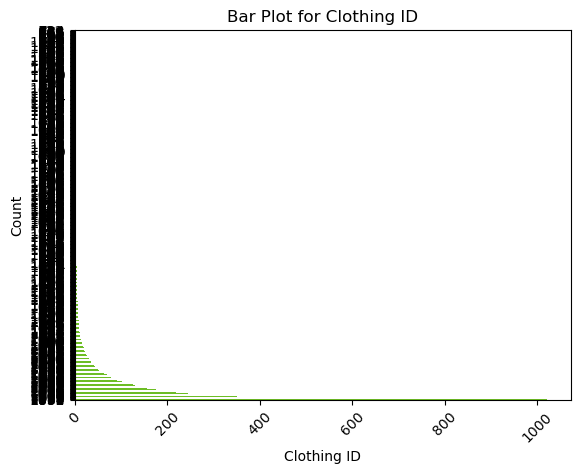

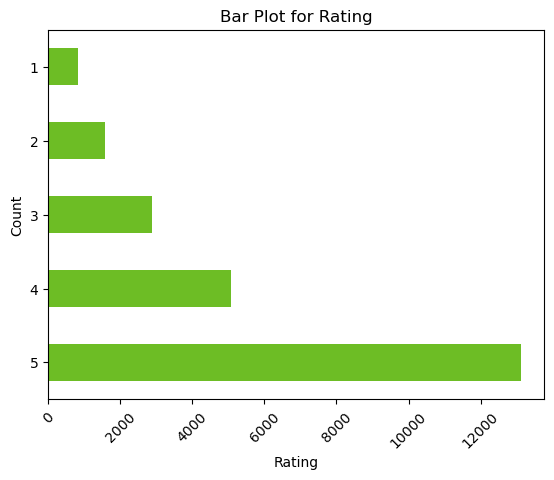

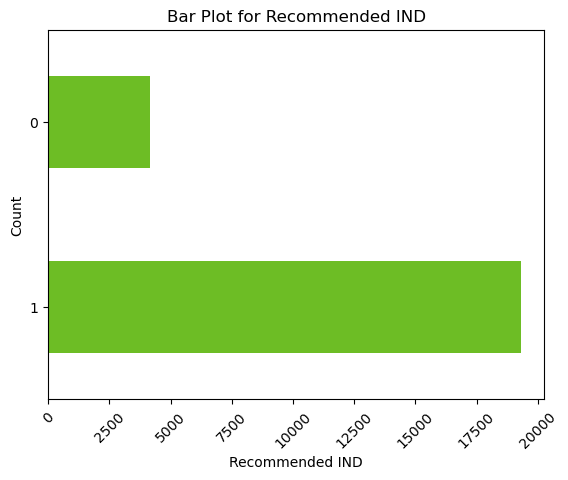

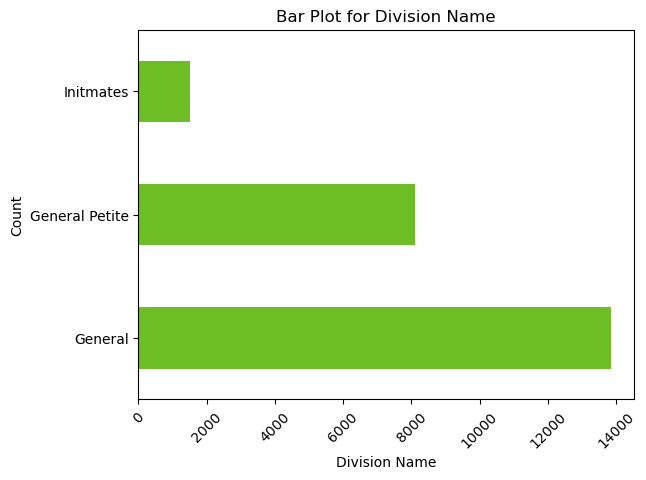

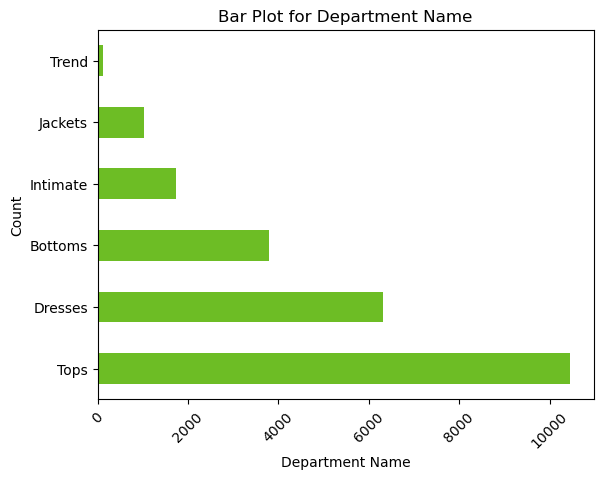

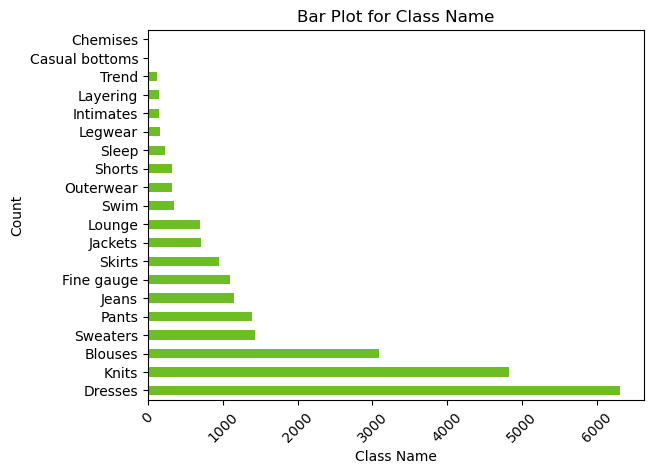

In [184]:
#Şimdi görselleştirelim

plot_color="#6DBD25"

for column,dtype in abt_data_types.items():
    if dtype=='categorical':
        plt.figure(num=f'{column}')
        data[column].value_counts().plot(kind='barh',color=plot_color)
        plt.title(f'Bar Plot for {column}')
        plt.xlabel(column)
        plt.ylabel('Count')


        plt.xticks(rotation=45)

        plt.show()

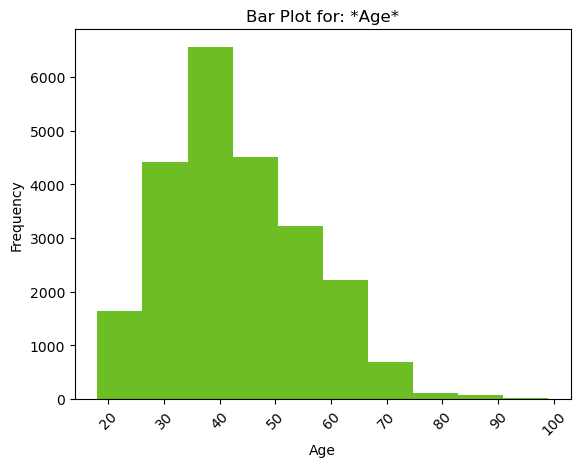

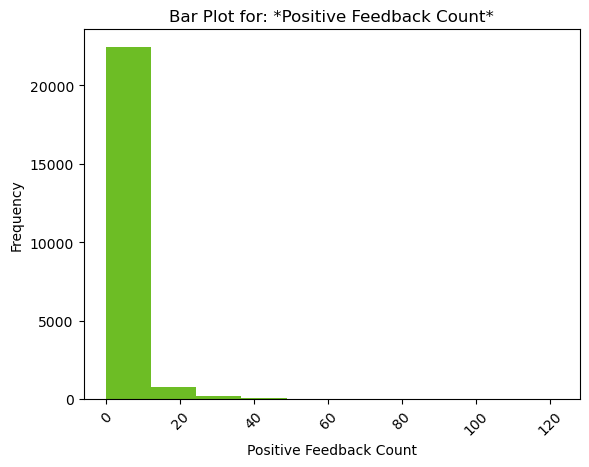

In [185]:
#Şimdi continuous columns için visualize edelim.
#continuous değerleri daha rahat görmek için histogramdan yararlanacağız.

for column, dtype in abt_data_types.items():

    if dtype=="continuous":
        plt.figure(num=f'* {column} *')  
        data[column].plot.hist(color=plot_color)
        plt.title(f'Bar Plot for: *{column}*')
        plt.xlabel(column)
        plt.ylabel('Frequency')
            
        plt.xticks(rotation=45)

        plt.show()

Normalde Age histogram grafiğinde left skew var. Ancak Domain bilgisi (alan bilgisi) işin içine girdiğinde bunun gayet normal olduğunu herhangi bir işlem yapılmasının gerekmediğini düşünüyoruz.

# Data Quality Report

Kitabı bir yaklaşım olup aşağıdaki işlemleri içerir. Her kolon için aşağıdaki özelliklerin çıkmasına ve bize daha fazla fikir vermesine olanak sağlar.

### For continious variables

-minimum

-1st quartile

-mean

-median

-3rd quartile

-maximum

-standard deviation

-total number of instances

-% of instances in ABT that are missing a value

-cardinality (# of unique values in that feature)



### For categorical variables

-mode 1 (most frequent value)

-raw frequency of mode 1

-% frequency of mode 1

-mode 2 (2nd most frequent value)

-raw frequency of mode 2

-% frequency of mode 2

-% of instances in ABT that are missing a value

-cardinality

In [186]:
def featureWise_dqr(a_series,feature,data_type,hassasiyet=2):

    """
    a_series: bir DataFrame
    data_type : continuous
    hassasiyet : round fonksiyonunnda kullandığımız hassasiyet değerimiz
    """

    report_dict = dict() #boş bir dict.
    report_dict["feature"]=feature


    #Contionus kolonlara sahip olanlar için

    if data_type == "continuous":
        print("continuous değerler hesaplanıyor ...")
        report_dict["missing_percent"] = round(len(a_series[a_series.isna()]) / len(a_series) * 100, hassasiyet) #bir kolondaki boş değerler
        report_dict["cardinality"] = a_series.nunique() #cardinality= bir kolondaki eşsiz verilen sayısıdır.
        report_dict["min"] = round(a_series.min(),hassasiyet)
        report_dict["1st_q"] = round(a_series.quantile([.25]).values[0],hassasiyet) #ilk çeyreklik
        report_dict["mean"] = round(a_series.mean(),hassasiyet)
        report_dict["median"] = round(a_series.median(),hassasiyet)
        report_dict["3rd_q"] = round(a_series.quantile([.75]).values[0],hassasiyet) #son çeyreklik
        report_dict["max"] = round(a_series.max(),hassasiyet)
        report_dict["std"] = round(a_series.std(),hassasiyet)

    #Şimdi geldik bi sonraki kolon tipimiz olan : categorical kolonlara 
    elif data_type == "categorical":
        print("categorical değerler hesaplanıyor ...")
        report_dict["missing_percent"] = round(len(a_series[a_series.isna()]) / len(a_series) * 100, hassasiyet)
        report_dict["cardinality"] = a_series.nunique()
        report_dict["mode1"] = a_series.mode().values[0] # en çok tekrar eden değer  
        report_dict["mode1_frequency_raw"]  = a_series.value_counts().iloc[0] #en çok tekrar eden değerin sıklığı
        report_dict["mode1_freq_perc"] = round((report_dict["mode1_frequency_raw"]/len(a_series)*100),hassasiyet) #en çok tekrar eden değerin yüzdesi

        report_dict["mode2"] = a_series.value_counts().index[1] #en çok tekrar eden 2. değer  
        report_dict["mode2_freq_raw"]  = a_series.value_counts().iloc[1] if report_dict["cardinality"] > 1 else np.nan  # en çok tekrar eden 2.değerin sıklığı
        report_dict["mode2_freq_perc"] = round((report_dict["mode2_freq_raw"]/len(a_series)*100),hassasiyet) #en çok tekrar eden 2. değerin yüzdesi

    
    #Son kolon tipimiz olan text kolonlarımıza:
    elif data_type == "text":
        token_counts = [len(x.split()) if type(x) is str else 0 for x in a_series] # kelime sayısı (boşluklarla ayırıyoruz.)
        char_counts = [len(x) if type(x) is str else 0 for x in a_series] #karakter sayısı 

        report_dict["missing_percent"] = round(sum(1 for value in char_counts if value < 2) / len(a_series) * 100, hassasiyet) 
        report_dict["mean_tok_count"]    = round(np.mean(token_counts), hassasiyet) #ortalama kelime sayısı
        report_dict["mean_char_count"]    = round(np.mean(char_counts), hassasiyet) #ortalama karakter sayısı
        report_dict["std_token_count"]    = round(np.std(token_counts), hassasiyet) #kelime sayısının standart sapması
        report_dict["std_char_count"]    = round(np.std(char_counts), hassasiyet) #karakter sayısının standart sapması
        report_dict["max_tok_count"]    = round(np.max(token_counts), hassasiyet) # en çok kullanılan kelime sayısı
        report_dict["max_char_count"]    = round(np.max(char_counts), hassasiyet) # en çok kullanılan karakter sayısı


        report_dict["tok_count_1st_q"]  = np.quantile(token_counts, 0.25) 
        report_dict["tok_count_2nd_q"]  = np.quantile(token_counts, 0.5)
        report_dict["tok_count_3nd_q"]  = np.quantile(token_counts, 0.75)

    return report_dict

In [187]:
#Şimdi yukarıdaki DataFrame çevirmek için fonksiyon yazalım.

def df_wise_dqr(a_df,abt_data_types):

    """Hesaplamaya çalıştığımız Data Quality Report'un bir DataFrame'e çevirişmiş halidir.."""

    #Boş listler oluşturma.
    categorical_dqr= list()
    continious_dqr = list()
    texts_dqr = list()

    for feature, data_type in abt_data_types.items():
        dqr_of_feature=featureWise_dqr(a_df[feature],feature,data_type)

        if data_type == "categorical":
            categorical_dqr.append(dqr_of_feature)
            print("e")
        
        elif data_type == "continuous":
            continious_dqr.append(dqr_of_feature)
            
        elif data_type == "text":
            texts_dqr.append(dqr_of_feature)
            print("f")

        
    return {"categorical": pd.DataFrame(categorical_dqr),
                "continuous": pd.DataFrame(continious_dqr),
                "text": pd.DataFrame(texts_dqr)}

In [188]:
data_Quality_report= df_wise_dqr(data,abt_data_types)

categorical değerler hesaplanıyor ...
e
continuous değerler hesaplanıyor ...
f
f
categorical değerler hesaplanıyor ...
e
categorical değerler hesaplanıyor ...
e
continuous değerler hesaplanıyor ...
categorical değerler hesaplanıyor ...
e
categorical değerler hesaplanıyor ...
e
categorical değerler hesaplanıyor ...
e


In [189]:
data_Quality_report["categorical"]

,feature,missing_percent,cardinality,mode1,mode1_frequency_raw,mode1_freq_perc,mode2,mode2_freq_raw,mode2_freq_perc
0,Clothing ID,0.00,1206,1078,1022,4.36,862,798,3.40
1,Rating,0.00,5,5,13108,55.87,4,5075,21.63
2,Recommended IND,0.00,2,1,19289,82.22,0,4172,17.78
3,Division Name,0.06,3,General,13834,58.97,General Petite,8111,34.57
4,Department Name,0.06,6,Tops,10451,44.55,Dresses,6314,26.91
5,Class Name,0.06,20,Dresses,6314,26.91,Knits,4831,20.59


In [190]:
data_continuous=data_Quality_report["continuous"]
data_continuous

,feature,missing_percent,cardinality,min,1st_q,mean,median,3rd_q,max,std
0,Age,0.0,77,18,34.0,43.20,41.0,52.0,99,12.28
1,Positive Feedback Count,0.0,82,0,0.0,2.54,1.0,3.0,122,5.70


In [191]:
data_Quality_report["text"]

#Çok uzun cümleler genellikle olumlu cümleler olarak baz alabiliriz.

,feature,missing_percent,mean_tok_count,mean_char_count,std_token_count,std_char_count,max_tok_count,max_char_count,tok_count_1st_q,tok_count_2nd_q,tok_count_3nd_q
0,Title,16.14,2.80,16.02,2.05,11.24,12,52,2.0,3.0,4.0
1,Review Text,29.64,42.36,217.23,36.49,185.85,115,508,0.0,40.0,75.0


## Data Quality Plan 

Veri kalitesi planında, geçerli veri hatalarından kaynaklanan bazı sorunları çözmeye/raporlamaya çalışacağız. Geçerli verilerdeki sorunlar, alana özgü özellikler, kötü dağıtılmış örnekleme, bazı örnek kümeleri için bazı özelliklerin toplanamaması, şişman parmaklar vb. nedenlerden kaynaklanabilirken, geçersiz verilerle ilgili sorunlar çoğunlukla ABT'nin bileşimi sırasında üretim hatasından kaynaklanmaktadır.


Geçersiz veri hatalarını ele almanın makul bir yolu ABT'yi yeniden üretmektir, ancak bizim durumumuzda ABT'yi yeniden üretme şansımız yoktur. Bu nedenle, geçersiz veri hatalarını ele alma stratejim, bunları basitçe atmak olacaktır.


In [192]:
#Eksik verileri kaldırma.

# -Yanlış silme işlemi-
data["Review Text"] =data["Review Text"].fillna("")

In [193]:
#Ancak doğrusu bu olmamlı.
data = data[data.apply(lambda x: False if len(x["Review Text"]) < 1 else True, axis=1)].copy()

#Çünkü " " ,"  "  bu tarz veriler de string sayıldığı için bunları hesaba katamıyoruz.

In [194]:
data.shape

(16506, 10)

In [195]:
def check_borders(the_dqr, feature):
    """    
    alt ve üst sınırların feature'da Aykırı Değer olduğunu inceleme. Kabul edilebilir bir sınır belirlemeye yarar.
    : the_dqr: data quality reporttaki dataFrame
    : feature
    """
    results = list()
    #Max değerin aykırı değer olup olmadığını kontrol etme
    dqr_dict         = the_dqr.set_index("feature").to_dict("index")
    max_outlier_prob = abs(abs(abs(dqr_dict[feature]["3rd_q"] - dqr_dict[feature]["max"]) 
                       - abs(dqr_dict[feature]["3rd_q"] - dqr_dict[feature]["median"]))) /(abs(dqr_dict[feature]["max"] - dqr_dict[feature]["min"])) * 100 
        
        
    min_outlier_prob =  abs(abs(dqr_dict[feature]["1st_q"] - dqr_dict[feature]["min"]) -
                            abs(dqr_dict[feature]["1st_q"] - dqr_dict[feature]["median"]))/(abs(dqr_dict[feature]["max"] - dqr_dict[feature]["min"])) * 100 
    
    results.append((feature, "min_being_outlier", min_outlier_prob))
    results.append((feature, "max_being_outlier", max_outlier_prob))

    return results

Hatalar:


In [196]:
check_borders(data_Quality_report["continuous"],"Age")

#Fonksiyonu yazdık ama kullanıp kullanmayacağımızı yine Domain bilgisi sağlayacaktır.

[('Age', 'min_being_outlier', 11.11111111111111),
 ('Age', 'max_being_outlier', 44.44444444444444)]

In [197]:
def plotColumn(data,column):    
    plot_color="#6DBD25"
    plt.figure(num=f'{column}')
    data[column].plot.hist(color=plot_color)
    plt.title(f"Bar Plot for {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")

    plt.xticks(rotation=45)
    plt.show()

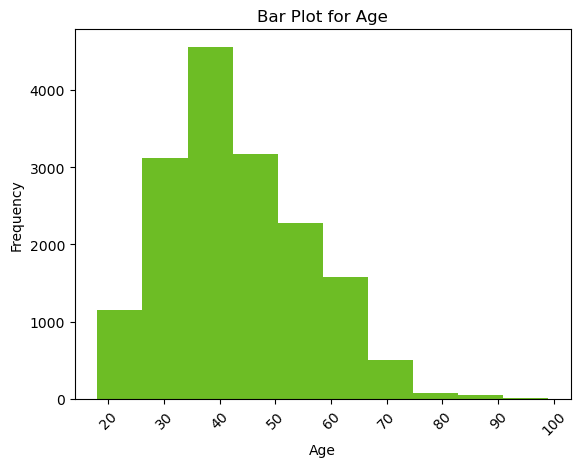

In [198]:
plotColumn(data=data,column="Age")

#Evet görüldüğü üzere, eğer 44 alırsak, burada veriyle oldukça oynamış olacağız ve sağlıksız bir veriyle karşı karşıya kalmış olacağız.

### Sınırlarla UĞRAŞMAK
-Clamping Transformation

-Removing


In [199]:
def clamp_transformation(data_df, feature, bounds=None, verbose=True):
    """
    Performs clamp transformation. When bounds are set, the transformation uses
    user-defined bounds; otherwise, it will automatically decide the boundaries.
    
    :param data_df: pandas.DataFrame
    :param feature: str, the column name in data_df to be transformed
    :param bounds: tuple, optional (lower_bound, upper_bound)
    :param verbose: bool, whether to print the lower and upper bounds
    
    Note: If bounds are not provided, the function uses interquartile range to determine
    the lower and upper bounds.
    """
    def _transform(value, _lower_bound, _upper_bound):
        if value < _lower_bound:
            return _lower_bound
        elif value > _upper_bound:
            return _upper_bound
        else:
            return value

    if bounds is None:
        dqr_dict = featureWise_dqr(data_df[feature], feature, "continuous")
        interquartile_range = dqr_dict["3rd_q"] - dqr_dict["1st_q"]
        lower_bound = dqr_dict["1st_q"] - 1.5 * interquartile_range
        upper_bound = dqr_dict["3rd_q"] + 1.5 * interquartile_range
    else:
        lower_bound = bounds[0]
        upper_bound = bounds[1]

    if verbose:
        print("** Lower bound set to {}, Upper bound set to {}".format(lower_bound, upper_bound))

    data_df[feature] = data_df[feature].apply(lambda x: _transform(x, lower_bound, upper_bound))

    return data_df[feature]

In [200]:
data_continuous.reset_index(drop=True, inplace=True)

# Transpose the DataFrame
transposed_df = data_continuous.T

# Set the first row as column headers
transposed_df.columns = transposed_df.iloc[0]

# Drop the first row (which is now duplicated as column headers)
transposed_df.drop(transposed_df.index[0], inplace=True)

# Now the DataFrame has "Age" and "Positive Feedback Count" as column headers
transposed_df

feature,Age,Positive Feedback Count
missing_percent,0.0,0.0
cardinality,77,82
min,18,0
1st_q,34.0,0.0
mean,43.2,2.54
median,41.0,1.0
3rd_q,52.0,3.0
max,99,122
std,12.28,5.7


In [201]:
x=clamp_transformation(transposed_df,"Age",verbose=True)
x

continuous değerler hesaplanıyor ...
** Lower bound set to -33.0, Upper bound set to 103.0


missing_percent     0.00
cardinality        77.00
min                18.00
1st_q              34.00
mean               43.20
median             41.00
3rd_q              52.00
max                99.00
std                12.28
Name: Age, dtype: float64

In [202]:
#Kendi verdiği değer saçmaladı o yüzden insiyatif alıp biz kendimiz ayarladık.

clamp_transformation(transposed_df,"Age",bounds=(0,70))

** Lower bound set to 0, Upper bound set to 70


missing_percent     0.00
cardinality        70.00
min                18.00
1st_q              34.00
mean               43.20
median             41.00
3rd_q              52.00
max                70.00
std                12.28
Name: Age, dtype: float64

In [203]:
transposed_df 

feature,Age,Positive Feedback Count
missing_percent,0.00,0.0
cardinality,70.00,82
min,18.00,0
1st_q,34.00,0.0
mean,43.20,2.54
median,41.00,1.0
3rd_q,52.00,3.0
max,70.00,122
std,12.28,5.7


In [204]:
#Done!